<a href="https://colab.research.google.com/github/carlosfab/escola-data-science/blob/master/notebooks/Aula_008_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png" height="100px"></p>

# Aula 008: TensorFlow

***Fashion MNIST*** é um *dataset* considerado o *Hello, World!* de **Deep Learning** aplicado a problemas de **Visão Computacional**.

Contendo 60 mil imagens para treinamento e 10 mil para teste, é um *dataset* bem melhor que o antigo **MNIST** (que continha apenas digitos manuscritos).

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Ao total, as 70 mil imagens têm dimensões de 28 x 28 *pixels*, como mostra a imagem acima. Cada uma dessas imagens é classificada com um desses 10 *labels*:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

Nesta Aula 008, iremos implementar uma rede neural que usa apenas camadas Densas, seguindo o *intuition* dados nas últimas 3 aulas.

No entanto, quando se trata de imagens, normalmente iremos procurar um tipo específico de rede neural: Redes Neurais Convolucionais (*Convolutional Neural Networks*).

Por enquanto, vamos entender como resolver o *Fashion MNIST* usando o TensorFlow.

In [0]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
# carregar os dados do Fashion MNIST
(X_train_orig, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# ver dimensionalidade
print("X_train:\t", X_train_orig.shape)
print("y_train:\t", y_train.shape)
print("X_test:\t\t", X_test.shape)
print("y_test:\t\t", y_test.shape)

X_train:	 (60000, 28, 28)
y_train:	 (60000,)
X_test:		 (10000, 28, 28)
y_test:		 (10000,)


Como usaremos um algoritmo de otimização baseado em gradiente, é preciso padronizar os pixels, o que é feito diretamente ao se dividir por 255.0. Ressalta-se que tal operação já transforma os `int` em `float`.

Como o *FASHION MNIST* não possui dados de validação, irei pegar 10% dos valores com essa finalidade.

In [0]:
# padronizar o dataset de treino e criar um de validação
X_valid, X_train = X_train_orig[:6000] / 255.0, X_train_orig[6000:] / 255.0
y_valid, y_train = y_train[:6000], y_train[6000:]

In [0]:
# De acordo com a documentação, os labels são:
class_names = ['Camisetas/top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [6]:
# ver exemplo de uma imagem aleatória
class_names[y_train[0]]

'Bolsa'

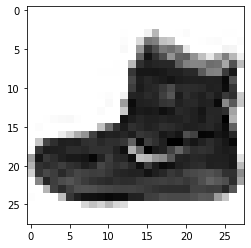

In [7]:
# plotar a imagem aleatória
plt.imshow(X_train_orig[0], cmap=plt.cm.binary);

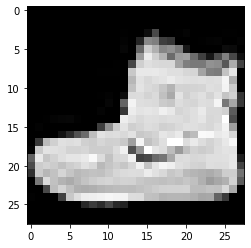

In [8]:
# plotar a imagem aleatória
plt.imshow(X_train_orig[0], cmap='gray');

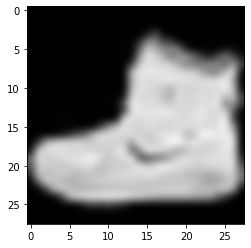

In [9]:
# plotar a imagem aleatória com interpolação diferente
plt.imshow(X_train_orig[0], cmap='gray', interpolation="bicubic");

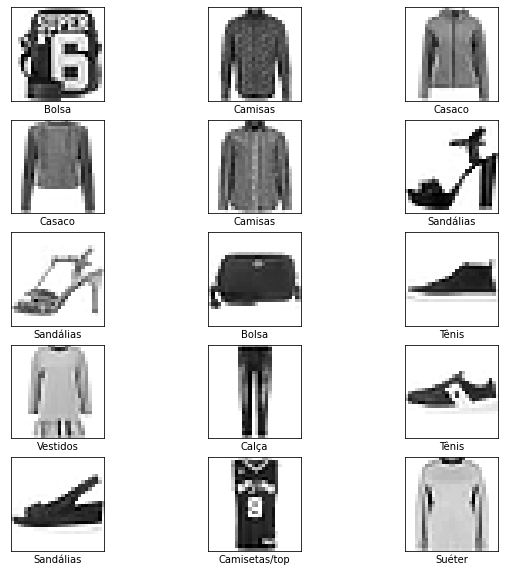

In [10]:
# ver algumas imagens de exemplo
plt.figure(figsize=(10,10))

for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Vamos criar um modelo bem simples de Rede Neural, usando apenas uma *hidden layer*.

In [0]:
# modelo 1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(784, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
# ver um resumo da rede
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
# ver lista dos layers
model.layers

In [0]:
# atribuir uma camada a uma variável
camada1 = model.layers[1]

In [15]:
# ver o nome de uma camada
camada1.name

'dense'

In [16]:
# selecionar o layer a partir de um nome
model.get_layer(name='dense')

In [17]:
# acessando os pesos dos layers
w, b = camada1.get_weights()

print("W: \t", w.shape)
print("b: \t", b.shape)

W: 	 (784, 784)
b: 	 (784,)


In [0]:
# compilando o modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [19]:
# treinando o modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.1649 - accuracy: 0.6651 - val_loss: 0.8019 - val_accuracy: 0.7378
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7232 - accuracy: 0.7563 - val_loss: 0.6626 - val_accuracy: 0.7657
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6357 - accuracy: 0.7803 - val_loss: 0.5999 - val_accuracy: 0.7915
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5886 - accuracy: 0.7951 - val_loss: 0.5660 - val_accuracy: 0.8068
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5579 - accuracy: 0.8052 - val_loss: 0.5389 - val_accuracy: 0.8153
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5363 - accuracy: 0.8128 - val_loss: 0.5217 - val_accuracy: 0.8207
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5191 - accuracy: 0.8192 - val_loss: 0.5121 - val_accuracy:

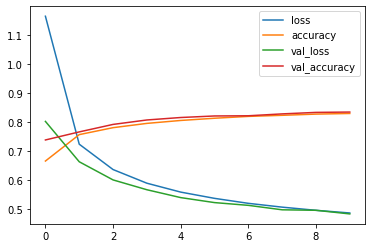

In [20]:
# plotar o histórico da otimização
pd.DataFrame(history.history).plot()
plt.show()

In [21]:
# avaliar o modelo
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7241 - accuracy: 0.7294


[1.724050521850586, 0.7293999791145325]

In [22]:
# modelo 2
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28,28)))
model2.add(keras.layers.Dense(300, activation='relu'))
model2.add(keras.layers.Dense(100, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

# compilando o modelo 2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# treinando o modelo 2
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4833 - accuracy: 0.8267 - val_loss: 0.3918 - val_accuracy: 0.8555
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8661 - val_loss: 0.3620 - val_accuracy: 0.8658
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3291 - accuracy: 0.8796 - val_loss: 0.3295 - val_accuracy: 0.8807
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.8852 - val_loss: 0.3138 - val_accuracy: 0.8887
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.8942 - val_loss: 0.3167 - val_accuracy: 0.8863
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2709 - accuracy: 0.8986 - val_loss: 0.3374 - val_accuracy: 0.8795
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2629 - accuracy: 0.9010 - val_loss: 0.3130 - val_accuracy:

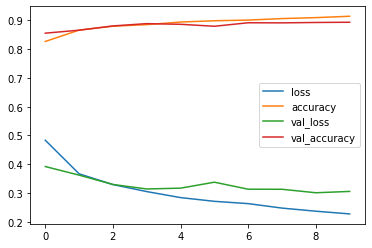

In [23]:
pd.DataFrame(history2.history).plot()
plt.show()

In [24]:
# avaliar o modelo 2
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 60.2688 - accuracy: 0.8577


[60.268802642822266, 0.857699990272522]

#### Redes Neurais Convolucionais

In [25]:
# modelo 3
model3 = keras.Sequential()

# definir a arquitetura da rede neural
model3.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model3.add(keras.layers.MaxPooling2D(pool_size=2))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=2))
model3.add(keras.layers.Dropout(0.3))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(256, activation='relu'))
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(10, activation='softmax'))

# Ver a aarquitetura do modelo 3
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics='accuracy')

In [27]:
model.fit(X_train, y_train, batch_size=64,
         epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4773 - accuracy: 0.8338 - val_loss: 0.4723 - val_accuracy: 0.8377
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4735 - accuracy: 0.8348 - val_loss: 0.4703 - val_accuracy: 0.8402
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4706 - accuracy: 0.8358 - val_loss: 0.4667 - val_accuracy: 0.8402
Epoch 4/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4677 - accuracy: 0.8365 - val_loss: 0.4626 - val_accuracy: 0.8422
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4647 - accuracy: 0.8372 - val_loss: 0.4605 - val_accuracy: 0.8398
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4618 - accuracy: 0.8393 - val_loss: 0.4586 - val_accuracy: 0.8403
Epoch 7/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4591 - accuracy: 0.8402 - val_loss: 0.4553 - val_accuracy: 0.8408
Epoch 